follows [this blog post](http://neuralnetworksanddeeplearning.com/chap6.html)

In [1]:
using PyPlot

INFO: Loading help data...


In [2]:
data_directory = "neural-networks-and-deep-learning/data/"

"neural-networks-and-deep-learning/data/"

In [3]:
training_data = readcsv(join([data_directory, "training.csv"]))';

In [4]:
training_answers = readcsv(join([data_directory, "training_answers.csv"]))[:];

In [5]:
validation_data = readcsv(join([data_directory, "validation.csv"]))';

In [6]:
validation_answers = readcsv(join([data_directory, "validation_answers.csv"]));

Label: 2

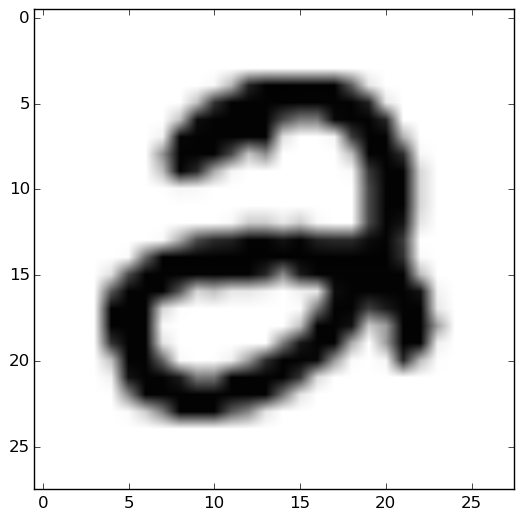

In [13]:
i = rand(1:50000)
imshow(reshape(training_data[:,i],(28,28))',cmap="Greys")
@printf("Label: %i", training_answers[i])

In [14]:
function feedforward(weights, biases, activations, f)
    for i = 1:length(weights)
        activations = f(weights[i] * activations + biases[i])
    end
    return activations ./ sum(activations)
end

feedforward (generic function with 1 method)

In [15]:
function sigmoid(x)
    return 1.0 ./ (1.0 + exp(-x))
end

sigmoid (generic function with 1 method)

In [17]:
function d_sigmoid(x)
    a = exp(-x)
    return a ./ ( 1 + a).^2
end

d_sigmoid (generic function with 1 method)

In [18]:
function backprop(weights, biases, input, answer, f, df)
    n = length(weights)
    
    function propagator(input, i)
        if i == n+1
            return -(answer./input + (answer - 1.0) ./ (1.0 - input))
        else
            weighted_sum = weights[i] * input + biases[i]
            layer_output = f(weighted_sum)
            d_layer_output = df(weighted_sum)
        
            backpropagator = propagator(layer_output, i+1) .* d_layer_output
            p_biases[i] -= backpropagator
            p_weights[i] -= backpropagator * input'
            return weights[i]' * backpropagator
        end
    end
    propagator(input, 1)
end


backprop (generic function with 1 method)

In [19]:
targets = Array(Any,10)
for i = 1:10
    a = zeros(10)
    a[i] = 1.0
    targets[i] = a
end

In [20]:
training_inted = convert(Array{Int32,1}, training_answers);

In [25]:
n_hidden = 30
n_input = 784
n_output = 10

weights = {randn(n_hidden, n_input)/sqrt(n_hidden*n_input), randn(n_output, n_hidden)}
biases = {randn(n_hidden), randn(n_output)}

p_weights = {zeros(n_hidden, n_input), zeros(n_output, n_hidden)}
p_biases = {zeros(n_hidden), zeros(n_output)}

2-element Array{Any,1}:
 [0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0  …  0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]
 [0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]                                            

In [26]:
n = length(validation_answers)

for j = 1:30
    for i = 1:50000
        p_weights *= 0.8
        p_biases *= 0.8
        backprop(weights, biases, training_data[:,i], targets[training_inted[i]+1], sigmoid, d_sigmoid);
        weights += 0.05 * p_weights
        biases += 0.05 * p_biases
    end
    
    accuracy = 0.0
    for i = 1:n
        if indmax(feedforward(weights, biases, validation_data[:,i], sigmoid))-1 == validation_answers[i]
            accuracy += 1.0
        end
    end
    @printf("Epoch %d: %f\n", j, accuracy/n)
end

Epoch 1: 0.909200
Epoch 2: 0.912500
Epoch 3: 0.922600
Epoch 4: 0.933000
Epoch 5: 0.933000
Epoch 6: 0.938500
Epoch 7: 0.936400
Epoch 8: 0.937400
Epoch 9: 0.938000
Epoch 10: 0.931000
Epoch 11: 0.941000
Epoch 12: 0.942900
Epoch 13: 0.945000
Epoch 14: 0.942100
Epoch 15: 0.939500
Epoch 16: 0.938100
Epoch 17: 0.943600
Epoch 18: 0.944500
Epoch 19: 0.944600
Epoch 20: 0.946500
Epoch 21: 0.945500
Epoch 22: 0.948300
Epoch 23: 0.945000
Epoch 24: 0.948500
Epoch 25: 0.948100
Epoch 26: 0.946300
Epoch 27: 0.945200
Epoch 28: 0.942900
Epoch 29: 0.948100
Epoch 30: 0.946800


Image number: 2138
Image Label: 9
Network Guess: 9

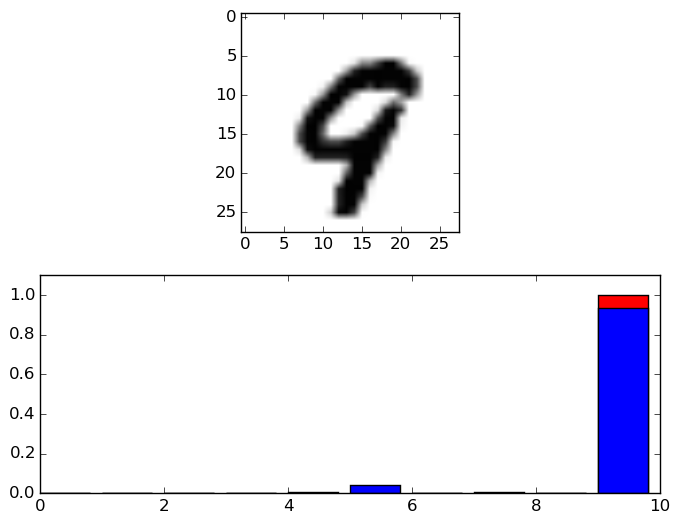

In [69]:
i = rand(1:50000)
network_guess = indmax(feedforward(weights,biases, training_data[:,i], sigmoid))-1
@printf("Image number: %d\nImage Label: %d\nNetwork Guess: %d", i, training_answers[i], network_guess)
subplot(211)
imshow(reshape(training_data[:,i],(28,28))',cmap="Greys")
subplot(212)
axis([0.0,10.0,0.0,1.1])
bar([0:9],[ (training_answers[i] == j ? 1.0 : 0.0) for j in 0:9 ], color="red")
bar([0:9],feedforward(weights,biases, training_data[:,i], sigmoid));

In [68]:
n = length(validation_answers)
accuracy = 0
for i = 1:n
    if indmax(feedforward(weights, biases, validation_data[:,i], sigmoid))-1 == validation_answers[i]
        accuracy += 1
    end
end
@printf("Network Accuracy: %f", accuracy/n)

Network Accuracy: 0.943400

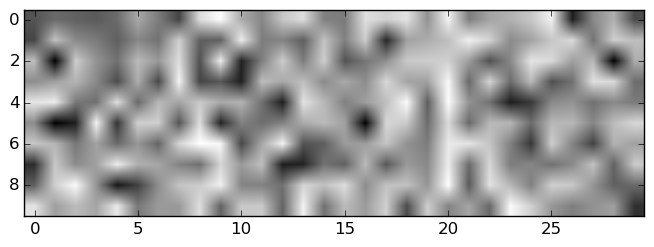

PyObject <matplotlib.image.AxesImage object at 0xa517f72c>

In [54]:
imshow(weights[2], cmap="Greys")

In [100]:
function sample( thing )
    i = 1
    x = rand()
    for j = 1:10
        x -= thing[i]
        if x < 0
            return j
            break
        end
    end
end

sample (generic function with 1 method)

In [101]:
feedforward(weights, biases, validation_data[:,1], sigmoid)

10-element Array{Float64,1}:
 1.08264e-5
 0.00013667
 0.00836052
 0.98065   
 5.1646e-7 
 0.00037059
 9.58759e-6
 9.73827e-7
 0.0104605 
 8.94349e-8

In [182]:
sample( feedforward(weights, biases, training_data[:,15143], sigmoid) )-1

0

In [173]:
function sample( w )
    x = rand() * sum( w )
    y = 0
    for i = 1:length(w)
        y = y + w[i]
        if x < y
            return i
        end
    end
end

sample (generic function with 1 method)